MINI-PROJET MDI220

In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import gamma

Exercice 1 (Exploration des données, recherche de leur loi):

Q1

In [9]:
filename= '/Users/eugeniedulout/Documents/COURS/telecom 2A/MDI220/NuclearPowerAccidents2016.csv'

df=pd.read_csv(filename)
cost=[]

#On formate la date
df['Date']=pd.to_datetime(df['Date'],dayfirst= True, infer_datetime_format = True)

#On trie et indexe par date
df= df.sort_values(by= 'Date')
df = df.set_index(['Date'])

#On créé un nouveau tableau avec seulement les accidents arrivés avant le 28 mars 1979
before_Three_Mile_Island= df.loc[:'1979-03-27']
cost_array=before_Three_Mile_Island['Cost (millions 2013US$)'].dropna()
cost=[cost_array[i] for i in range(cost_array.shape[0])]
print('Il y a eu', len(cost),'accidents avant Three MileIsland.')
print('Voici leur coût:',cost)


Il y a eu 55 accidents avant Three MileIsland.
Voici leur coût: [0.0, 1100.0, 52.4, 4400.0, 2900.0, 1500.0, 1300.0, 8189.0, 1733.4, 89.9, 0.0, 77.0, 0.0, 0.0, 37.5, 38.0, 25.7, 800.0, 0.0, 6.1, 793.9, 1100.0, 87.7, 0.0, 1900.0, 25.7, 84.5, 16.1, 425.2, 2500.0, 541.4, 100.0, 150.0, 60.1, 100.0, 0.0, 1330.0, 1.1, 180.0, 1.2, 98.0, 788.4, 11.8, 990.0, 4.4, 11.4, 277.1, 15.0, 99.5, 511.5, 0.0, 3500.0, 1964.5, 17.1, 13.9]


Q2: En statistiques, le diagramme Quantile-Quantile ou diagramme Q-Q ou Q-Q plot est un outil graphique permettant d'évaluer la pertinence de l'ajustement d'une distribution donnée à un modèle théorique.



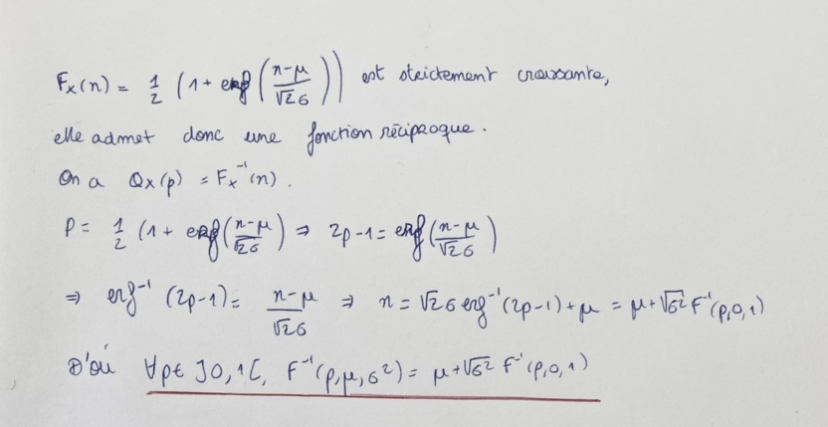

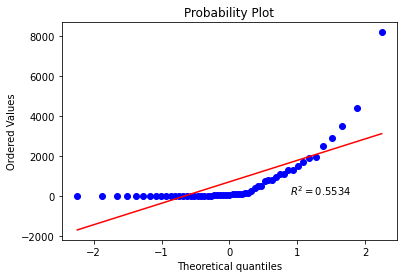

QQ-plot de données pour la loi normale. 
 La courbe ne ressemble pas à une droie, le modèle normal est réfuté.


In [10]:
qq=scipy.stats.probplot(cost, plot=plt, dist='norm', fit=True, rvalue=True)
plt.show()
print('QQ-plot de données pour la loi normale.','\n','La courbe ne ressemble pas à une droie, le modèle normal est réfuté.')

Q3

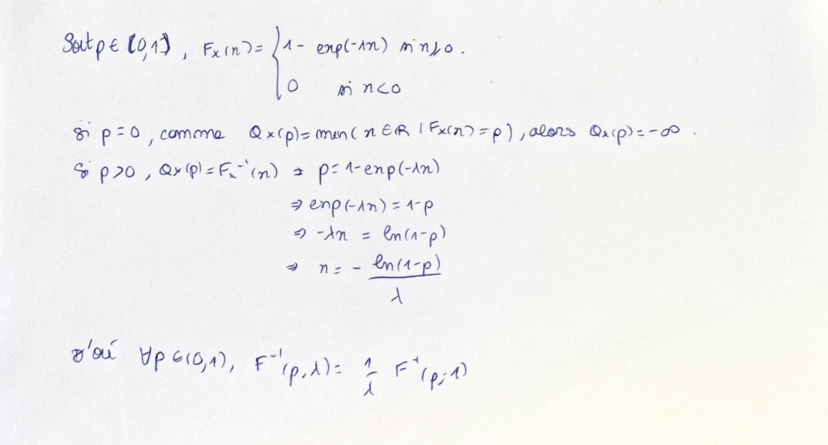

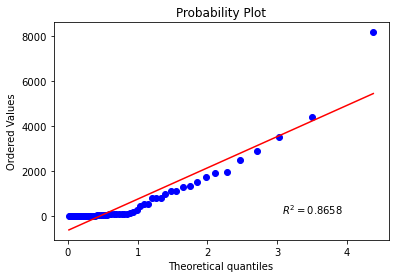

QQ-plot de données pour la loi exponentielle


In [11]:
qq=scipy.stats.probplot(cost, plot=plt, dist=scipy.stats.expon, fit=True, rvalue=True)
plt.show()
print('QQ-plot de données pour la loi exponentielle')

Q4

La R-value pour le modèle exponentiel est beaucoup plus élevée que celle du modèle normal. La loi exponentielle semble donc plus plausible.

Exercice 2 (Estimation ponctuelle des paramètres d’une loi exponentielle):

Q1

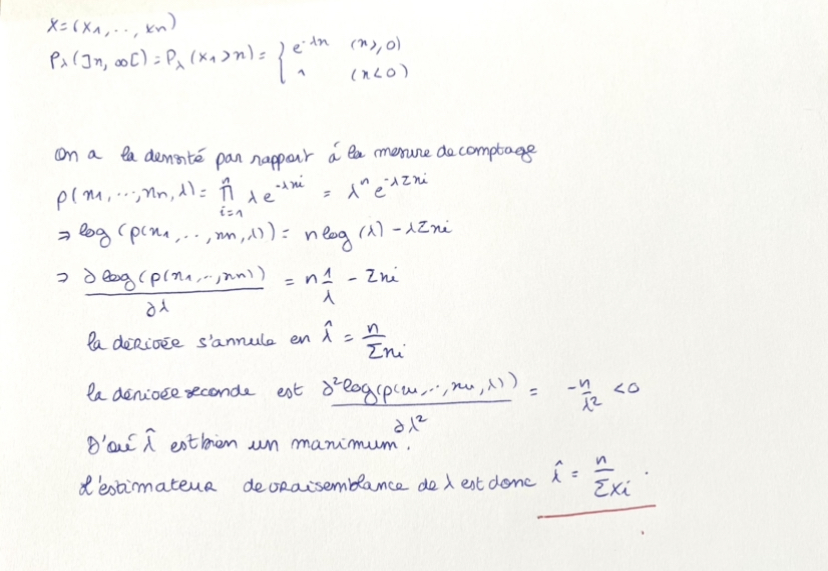

Q2

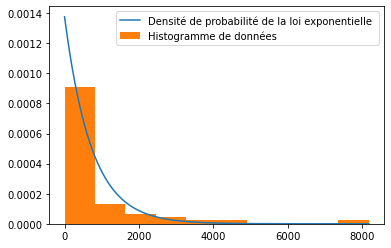

In [12]:
#Estimateur de vraisemblance
sum_x = sum(cost)
n=len(cost)
estim_vraisemblance = n/sum_x
abscisse = np.arange(max(cost))
loi_exp=Y=[estim_vraisemblance *np.exp(-estim_vraisemblance*k) for k in abscisse]
plt.plot(abscisse, loi_exp,label="Densité de probabilité de la loi exponentielle ")
plt.hist(cost, density=True,label="Histogramme de données")
plt.legend()
plt.show()

Q3

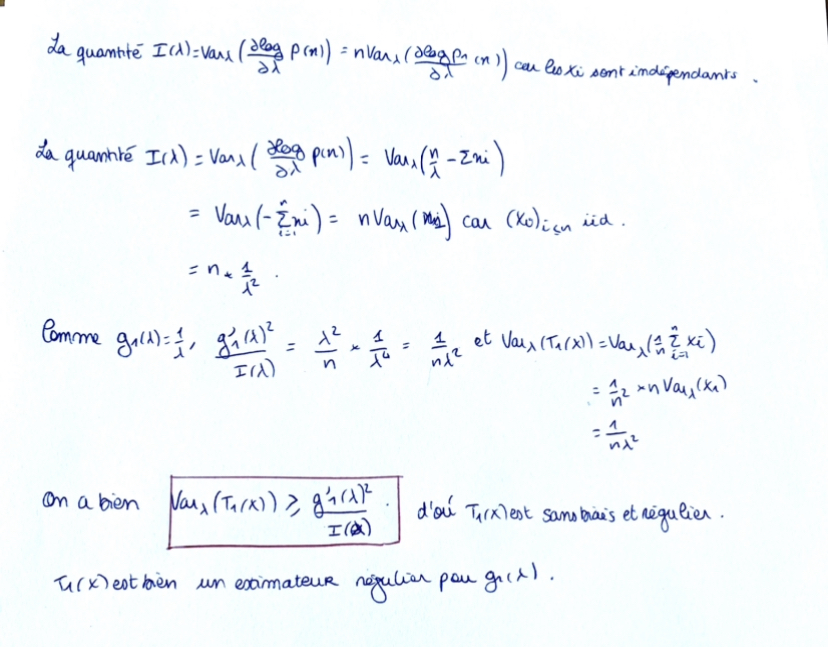

Q4

In [13]:
print("La valeur de g1 avec l'estimateur T1 est", sum(cost)/n)

La valeur de g1 avec l'estimateur T1 est 726.3363636363638


Q5

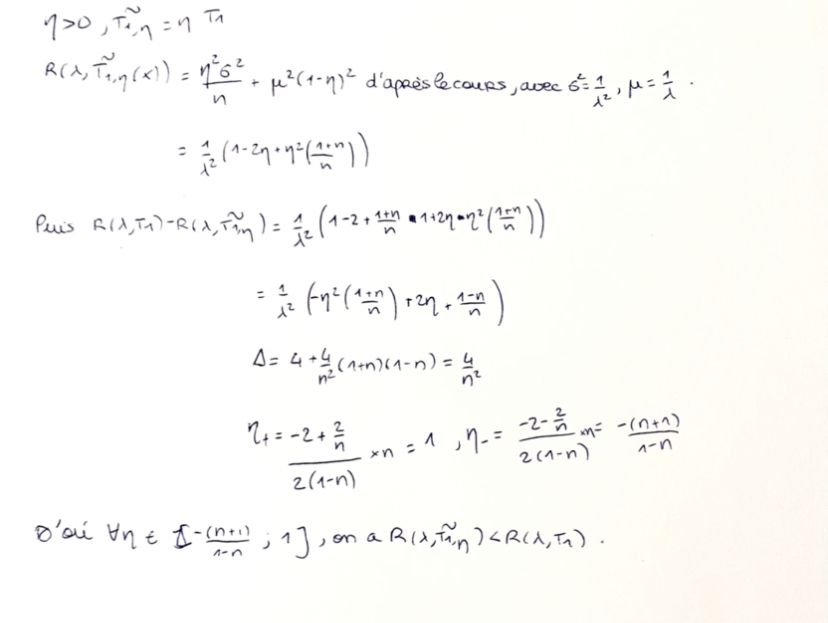

Ce résultat ne contredit pas la question précédente parce que T1,éta est biaisé.

Q6

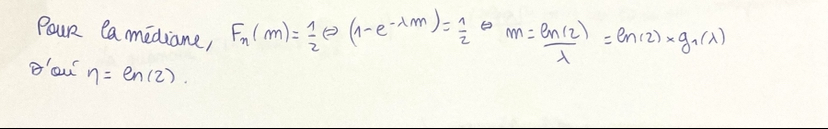

In [108]:
print("Médiane:",np.median(cost))

Médiane: 89.9


In [107]:
print("Médiane estimée:",np.log(2)*726)

Médiane estimée: 503.2248530865203


Q7

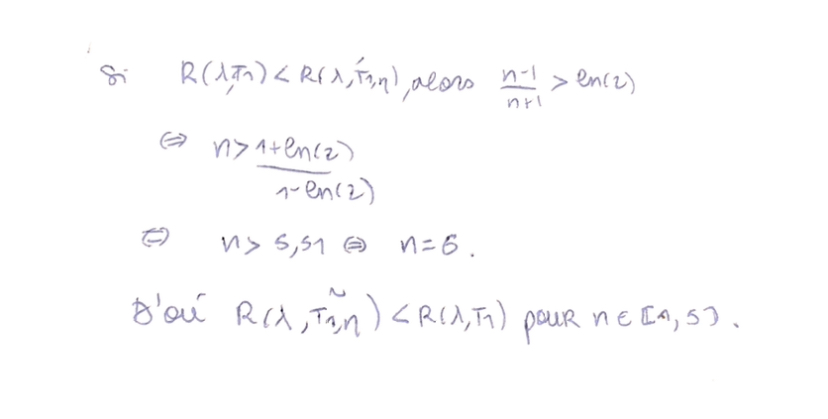

Exercice 3: Test sur le paramètre d’une loi

Q1

H0: Le coût moyen d’un accident est inférieur à un milliard de dollars. Soit lambda0 = 1000.
H1:Le coût moyen d’un accident est supérieur à un milliard de dollars. Soit lambda1 < 1000.


Q2

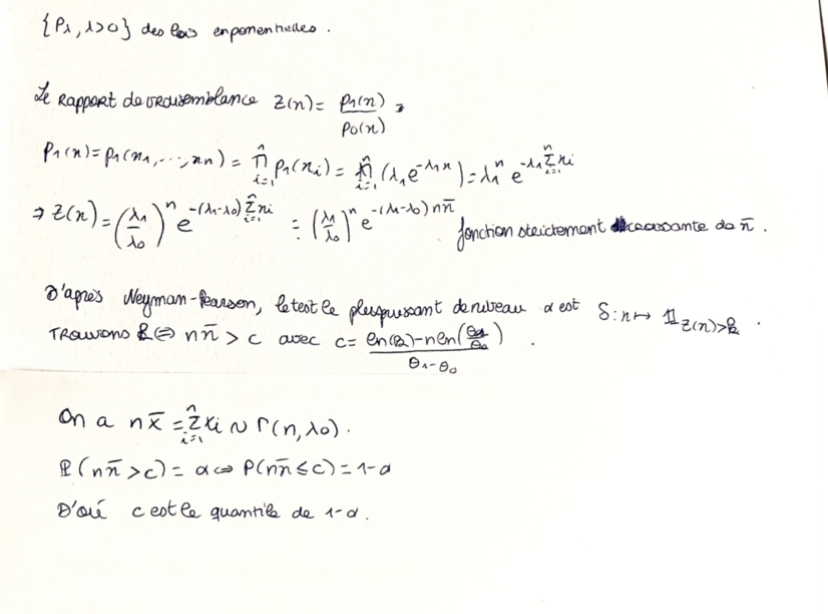

Q3 

In [111]:
print("La P-valeur est",p_valeur)
print("On accepte donc l'hypothèse selon laquelle le coût moyen d’accident est inférieur à un milliard de dollars" )

La P-valeur est 0.9862825135767351
On accepte donc l'hypothèse selon laquelle le coût moyen d’accident est inférieur à un milliard de dollars


Q4

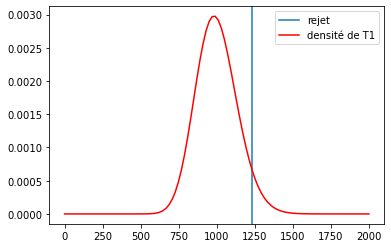

In [109]:
x = np.linspace(0,2000,100)
lambda0 = 10E-3
n = 55 
rejection = gamma.ppf(0.95, n, scale = 1000)/n
plt.axvline(x=rejection, label='rejet') 
densite= gamma.pdf(x, n, scale=1 / (n*lambd))
plt.plot(x,densite,color='red', label = 'densité de T1')
plt.legend()

On rejette tout ce qui est à droite de la droite rejet.

Q5

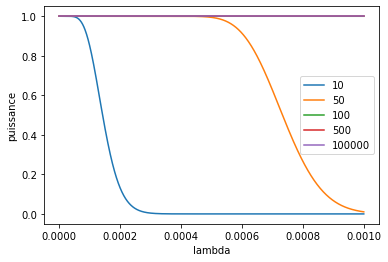

In [113]:
N = [10, 50, 100, 500, 100000]
lambda_values = np.linspace(0,0.001,1000)
lambda_values = np.delete(lambda_values,0)
r = gamma.ppf(0.95, len(cost), scale = 1000)

for n in N:
    y =[(1 - gamma.cdf(r, a=n, scale = 1/x)) for x in lambda_values]
    plt.plot(lambda_values,y)
plt.xlabel("lambda")
plt.ylabel("puissance")
plt.legend(N)
plt.show()

Plus n est grand, plus le test devient précis.

Q6

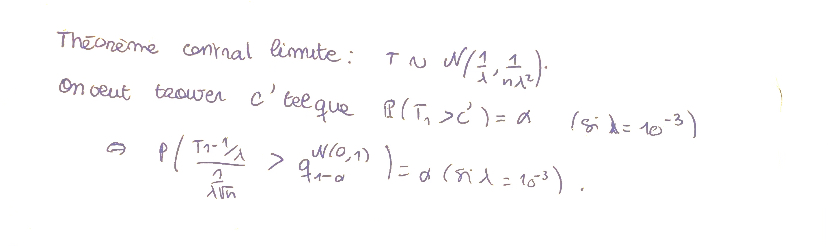

In [101]:
print("On rejette le test si H0 est supérieur à",np.quantile(scipy.stats.norm.rvs(size = 10000),0.95))
print("H0=", ((sum_x/n)-1/10E-3) * (10E-3) * np.sqrt(n)/n)
print("On accepte ce test.")

On rejette le test si H0 est supérieur à 1.6154123244797065
H0= -0.003149644835257656
On accepte ce test.
